In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Data Cleaning

In [37]:
df.head()

,Person ID,Gender,Age,Age Group,Occupation,Sleep Duration,Sleep Duration Range,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Heart Rate Range,Daily Steps,Daily Steps Range,Sleep Disorder
0,1,Male,27,26-30,Software Engineer,6.1,6-7,6,42,6,Overweight,126/83,77,76-80,4200,4001-6000,NaN
1,2,Male,28,26-30,Doctor,6.2,6-7,6,60,8,Normal,125/80,75,71-75,10000,8001-10000,NaN
2,3,Male,28,26-30,Doctor,6.2,6-7,6,60,8,Normal,125/80,75,71-75,10000,8001-10000,NaN
3,4,Male,28,26-30,Sales Representative,5.9,5-6,4,30,8,Obese,140/90,85,81-85,3000,2001-4000,Sleep Apnea
4,5,Male,28,26-30,Sales Representative,5.9,5-6,4,30,8,Obese,140/90,85,81-85,3000,2001-4000,Sleep Apnea


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Age Group                374 non-null    object 
 4   Occupation               374 non-null    object 
 5   Sleep Duration           374 non-null    float64
 6   Sleep Duration Range     374 non-null    object 
 7   Quality of Sleep         374 non-null    int64  
 8   Physical Activity Level  374 non-null    int64  
 9   Stress Level             374 non-null    int64  
 10  BMI Category             374 non-null    object 
 11  Blood Pressure           374 non-null    object 
 12  Heart Rate               374 non-null    int64  
 13  Heart Rate Range         374 non-null    object 
 14  Daily Steps              3

In [39]:
df_cleaned = df.drop(['Sleep Disorder', 'Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps'], axis=1)

In [40]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Person ID                374 non-null    int64 
 1   Gender                   374 non-null    object
 2   Age Group                374 non-null    object
 3   Occupation               374 non-null    object
 4   Sleep Duration Range     374 non-null    object
 5   Quality of Sleep         374 non-null    int64 
 6   Physical Activity Level  374 non-null    int64 
 7   Stress Level             374 non-null    int64 
 8   BMI Category             374 non-null    object
 9   Blood Pressure           374 non-null    object
 10  Heart Rate Range         374 non-null    object
 11  Daily Steps Range        374 non-null    object
dtypes: int64(4), object(8)
memory usage: 35.2+ KB


In [41]:
df_cleaned.head(1)

,Person ID,Gender,Age Group,Occupation,Sleep Duration Range,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate Range,Daily Steps Range
0,1,Male,26-30,Software Engineer,6-7,6,42,6,Overweight,126/83,76-80,4001-6000


# Exploratory Data Analysis(EDA)

In [42]:
df_cleaned.columns

Index(['Person ID', 'Gender', 'Age Group', 'Occupation',
       'Sleep Duration Range', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate Range',
       'Daily Steps Range'],
      dtype='object')

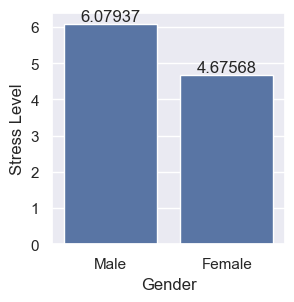

In [80]:
stress_gender = df_cleaned.groupby(['Gender'], as_index=False)['Stress Level'].mean().sort_values(by='Stress Level', ascending=False)
sns.set(rc={'figure.figsize':(3,3)})
ax= sns.barplot(x = 'Gender', y= 'Stress Level' ,data = stress_gender)

for bar in ax.containers:
    ax.bar_label(bar)

*From the above graph we can see that Stress Level of Males is more than that of Females.*

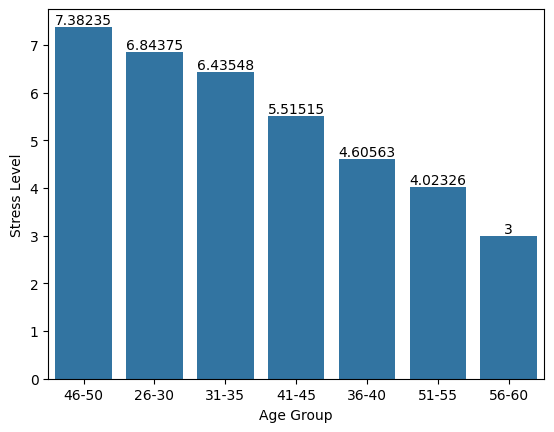

In [48]:
stress_age = df_cleaned.groupby(['Age Group'], as_index=False)['Stress Level'].mean().sort_values(by='Stress Level', ascending=False)

ax= sns.barplot(x = 'Age Group', y= 'Stress Level' ,data = stress_age)

for bar in ax.containers:
    ax.bar_label(bar)

*From the above graph we can see that Stress Level in the Age group of 46-50 years is maximum and it is minimum in the age group of 56-60 years.*

In [49]:
df_cleaned.columns

Index(['Person ID', 'Gender', 'Age Group', 'Occupation',
       'Sleep Duration Range', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate Range',
       'Daily Steps Range'],
      dtype='object')

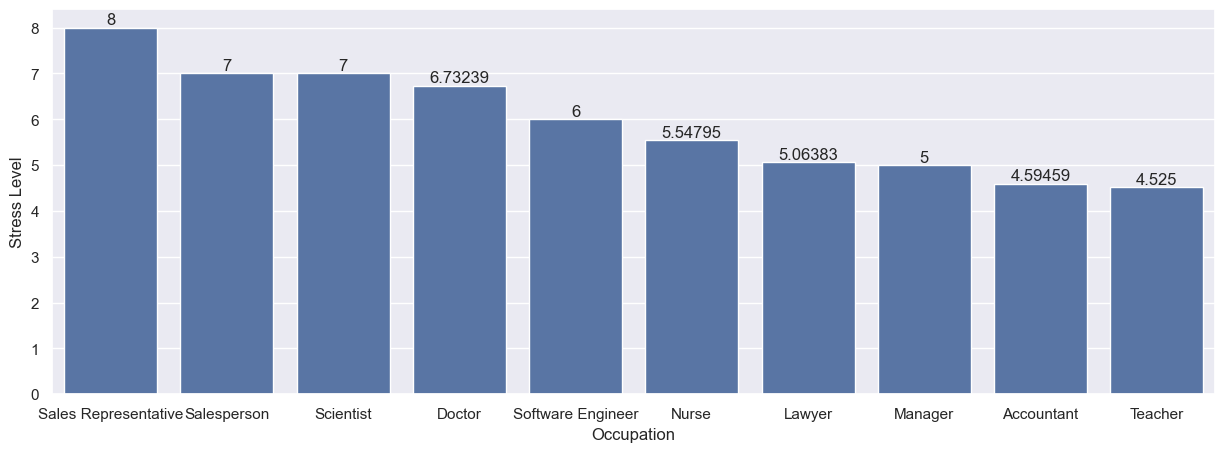

In [55]:
stress_occupation = df_cleaned.groupby(['Occupation'], as_index=False)['Stress Level'].mean().sort_values(by='Stress Level', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
ax= sns.barplot(x = 'Occupation', y= 'Stress Level' ,data = stress_occupation)

for bar in ax.containers:
    ax.bar_label(bar)

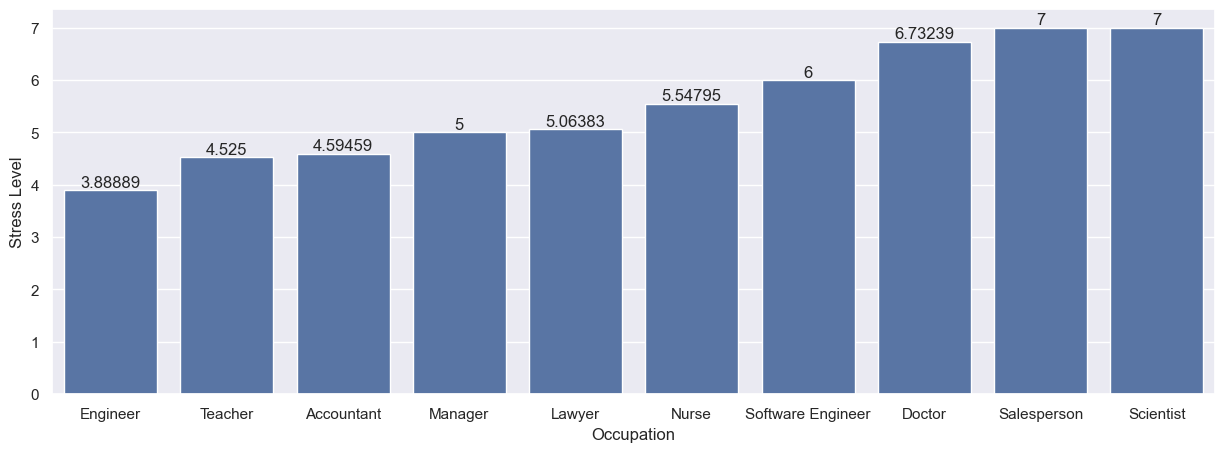

In [61]:
stress_occupation = df_cleaned.groupby(['Occupation'], as_index=False)['Stress Level'].mean().sort_values(by='Stress Level', ascending=True).head(10)
sns.set(rc={'figure.figsize':(15,5)})
ax= sns.barplot(x = 'Occupation', y= 'Stress Level' ,data = stress_occupation)

for bar in ax.containers:
    ax.bar_label(bar)

*From the above graphs we can see that the people with Sales Representative as their occupation has the maximum Stress Level and Engineers have the minimum Stress Level.*

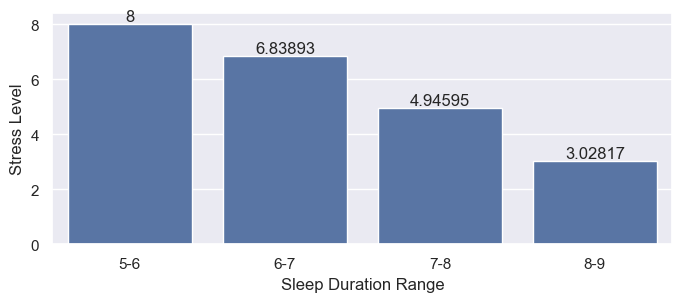

In [59]:
stress_sleep = df_cleaned.groupby(['Sleep Duration Range'], as_index=False)['Stress Level'].mean().sort_values(by='Stress Level', ascending=False)
sns.set(rc={'figure.figsize':(8,3)})
ax= sns.barplot(x = 'Sleep Duration Range', y= 'Stress Level' ,data = stress_sleep)

for bar in ax.containers:
    ax.bar_label(bar)

*From the above graph we can see that people with the sleep duration of 5-6 hours has the maximum stress level and people with the sleep duration of 8-9 hours has the minimum stress level.*

In [62]:
df_cleaned.columns

Index(['Person ID', 'Gender', 'Age Group', 'Occupation',
       'Sleep Duration Range', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate Range',
       'Daily Steps Range'],
      dtype='object')

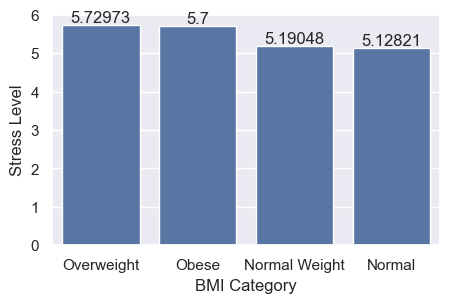

In [65]:
stress_bmi = df_cleaned.groupby(['BMI Category'], as_index=False)['Stress Level'].mean().sort_values(by='Stress Level', ascending=False)
sns.set(rc={'figure.figsize':(5,3)})
ax= sns.barplot(x = 'BMI Category', y= 'Stress Level' ,data = stress_bmi)

for bar in ax.containers:
    ax.bar_label(bar)

*From the above graph we can see that the Overweight people has the maximum stress level and Normal people has the minimum stress level.*

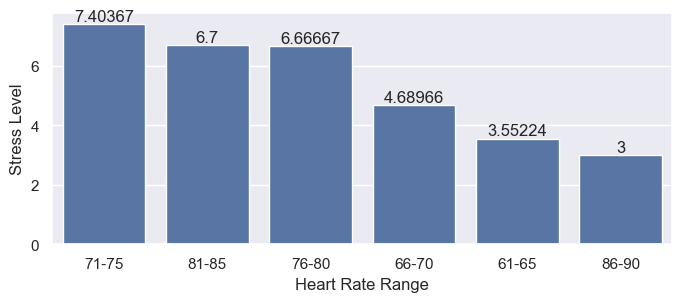

In [71]:
stress_heart_rate = df_cleaned.groupby(['Heart Rate Range'], as_index=False)['Stress Level'].mean().sort_values(by='Stress Level', ascending=False)
sns.set(rc={'figure.figsize':(8,3)})
ax= sns.barplot(x = 'Heart Rate Range', y= 'Stress Level', data = stress_heart_rate)

for bar in ax.containers:
    ax.bar_label(bar)

*From the above graph we can see that people with heart-rate between the range of 71-75 has the maximum stress level and people with 86-90 heart-rate range has the minimum stress level.*

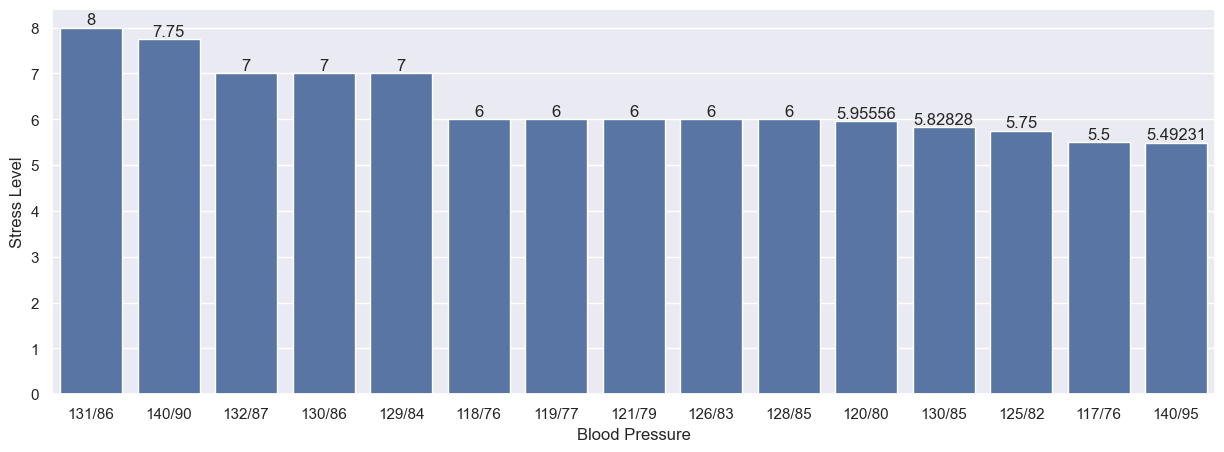

In [75]:
stress_heart_rate = df_cleaned.groupby(['Blood Pressure'], as_index=False)['Stress Level'].mean().sort_values(by='Stress Level', ascending=False).head(15)
sns.set(rc={'figure.figsize':(15,5)})
ax= sns.barplot(x = 'Blood Pressure', y= 'Stress Level', data = stress_heart_rate)

for bar in ax.containers:
    ax.bar_label(bar)

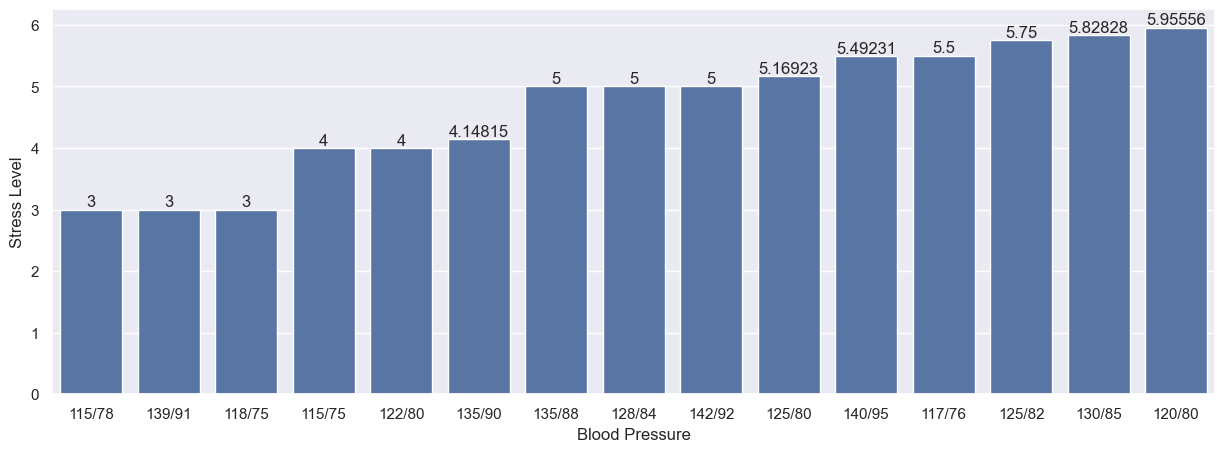

In [76]:
stress_heart_rate = df_cleaned.groupby(['Blood Pressure'], as_index=False)['Stress Level'].mean().sort_values(by='Stress Level', ascending=True).head(15)
sns.set(rc={'figure.figsize':(15,5)})
ax= sns.barplot(x = 'Blood Pressure', y= 'Stress Level', data = stress_heart_rate)

for bar in ax.containers:
    ax.bar_label(bar)

*From the above graphs we can see that people with blood pressure between 131/86 has the maximum stress level and people with blood pressure between 115/78 has the minimum stress level.*

# Conclusion

*Men in the age group of 46-50 yrs, working in Sales Representative occupation, having a sleep duration of 5-6 hours, Overweight BMI, heart-rate between 71-75, and blood pressure between 131/86 have the maximum Stress Level.*